In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
from DataPreparation import get_accident_df, get_small_df
from DataPreparation import refine_df, mergedPopulationCounts

In [4]:
#df = pd.read_csv("US_Accidents_June20.csv")
df = get_small_df(300000)
df = refine_df(df)

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   ID                    3000 non-null   object         
 1   Source                3000 non-null   object         
 2   TMC                   2133 non-null   float64        
 3   Severity              3000 non-null   int64          
 4   StartTime             3000 non-null   datetime64[ns] 
 5   EndTime               3000 non-null   datetime64[ns] 
 6   StartLat              3000 non-null   float64        
 7   StartLng              3000 non-null   float64        
 8   EndLat                867 non-null    float64        
 9   EndLng                867 non-null    float64        
 10  Distance              3000 non-null   float64        
 11  Description           3000 non-null   object         
 12  Number                1065 non-null   float64        
 13  Str

In [6]:
df_merged = mergedPopulationCounts(df)
df_merged = df_merged.set_index('City + State')

In [8]:
df_merged.head()

,City,State,Population,lat,lon,Counts,Counts per 100K
City + State,,,,,,,
"Perris, CA",Perris,CA,72326,33.782519,-117.228648,2,2.765257
"Cleveland, OH",Cleveland,OH,390113,41.499320,-81.694361,6,1.538016
"Columbia, SC",Columbia,SC,133358,34.000710,-81.034814,19,14.247364
"Lafayette, LA",Lafayette,LA,124276,30.224090,-92.019843,5,4.023303
"Buena Park, CA",Buena Park,CA,82882,33.867514,-117.998118,2,2.413069


## Bar plot: Accidents per 100K for twenty most populous US citites

Text(0, 0.5, 'Accidents per 100K inhabitants')

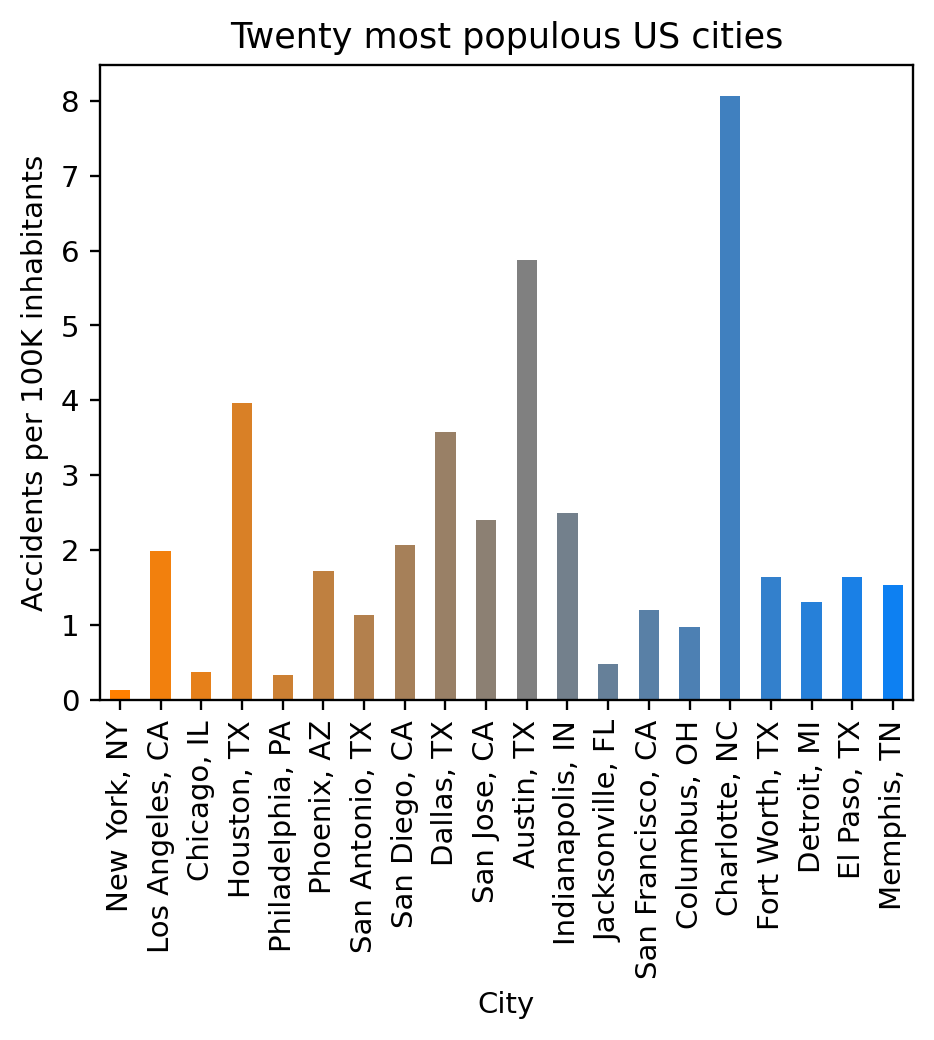

In [9]:
l = 20
my_colors2 = [((l-x)/l, 0.5, x/l) for x in range(l)]
plt.figure(figsize=(5, 4), dpi=210)
df_merged.nlargest(l, columns=['Population'])['Counts per 100K'].plot.bar(color=my_colors2)
plt.title("Twenty most populous US cities")
plt.xlabel("City")
plt.ylabel("Accidents per 100K inhabitants")
#plt.savefig("MostPopCitiesCounts.png",dpi=210)

## Bar plot: Twenty US citites with most accidents per 100K inhabitants

Text(0, 0.5, 'Accidents per 100K inhabitants')

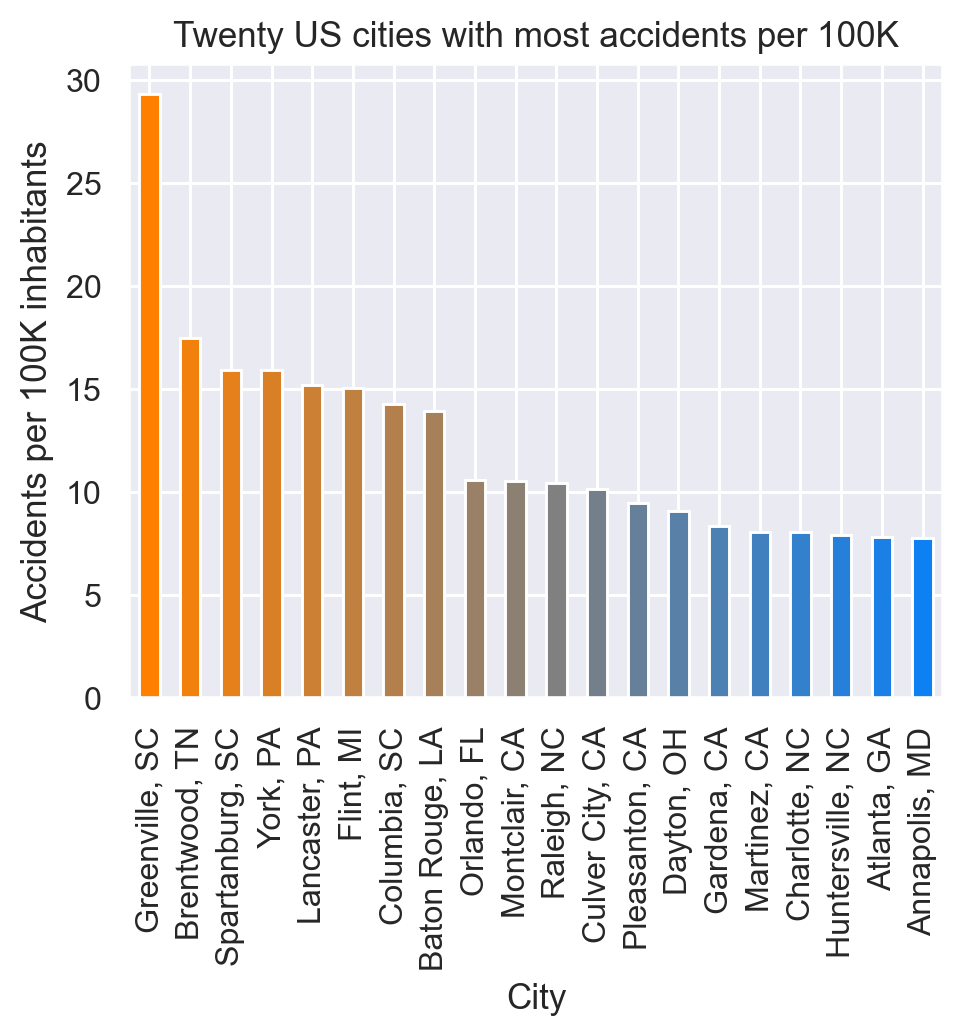

In [15]:
l = 20
my_colors2 = [((l-x)/l, 0.5, x/l) for x in range(l)]
plt.figure(figsize=(5, 4), dpi=210)
df_merged.nlargest(l, columns=['Counts per 100K'])['Counts per 100K'].plot.bar(color=my_colors2)
plt.title("Twenty US cities with most accidents per 100K")
plt.xlabel("City")
plt.ylabel("Accidents per 100K inhabitants")
#plt.savefig("MostAccCitiesCounts.png",dpi=210)

## Table of cities with highest accidents per 100K

In [10]:
df_merged.nlargest(10, columns=['Counts per 100K'])

,City,State,Population,lat,lon,Counts,Counts per 100K
City + State,,,,,,,
"Greenville, SC",Greenville,SC,61397,34.852618,-82.394010,18,29.317393
"Brentwood, TN",Brentwood,TN,40021,36.033116,-86.782777,7,17.490817
"Spartanburg, SC",Spartanburg,SC,37647,34.949567,-81.932048,6,15.937525
"York, PA",York,PA,43935,39.962598,-76.727745,7,15.932628
"Lancaster, PA",Lancaster,PA,59325,40.037875,-76.305514,9,15.170670
"Flint, MI",Flint,MI,99763,43.012527,-83.687456,15,15.035634
"Columbia, SC",Columbia,SC,133358,34.000710,-81.034814,19,14.247364
"Baton Rouge, LA",Baton Rouge,LA,229426,30.458283,-91.140320,32,13.947852
"Orlando, FL",Orlando,FL,255483,28.538335,-81.379237,27,10.568218


## Table of most populous citites

In [11]:
df_merged.nlargest(25, columns=['Population'])

,City,State,Population,lat,lon,Counts,Counts per 100K
City + State,,,,,,,
"New York, NY",New York,NY,8405837,40.712784,-74.005941,11,0.130861
"Los Angeles, CA",Los Angeles,CA,3884307,34.052234,-118.243685,77,1.982336
"Chicago, IL",Chicago,IL,2718782,41.878114,-87.629798,10,0.367812
"Houston, TX",Houston,TX,2195914,29.760427,-95.369803,87,3.961904
"Philadelphia, PA",Philadelphia,PA,1553165,39.952584,-75.165222,5,0.321923
"Phoenix, AZ",Phoenix,AZ,1513367,33.448377,-112.074037,26,1.718023
"San Antonio, TX",San Antonio,TX,1409019,29.424122,-98.493628,16,1.135542
"San Diego, CA",San Diego,CA,1355896,32.715738,-117.161084,28,2.065055
"Dallas, TX",Dallas,TX,1257676,32.776664,-96.796988,45,3.578028


## Scatter plot: Number of accidents vs. population

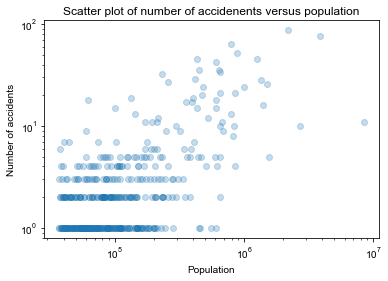

In [13]:
splot2 = sns.regplot(x="Population", y="Counts", 
                    data=df_merged,
                    scatter_kws={'alpha':0.25},
                    fit_reg=False)
sns.set(rc={"figure.figsize":(10,10)})
splot2.set(xscale="log",yscale="log")
plt.title("Scatter plot of number of accidenents versus population")
plt.xlabel("Population")
plt.ylabel("Number of accidents")
#plt.savefig("MostAccCitiesCounts.png",dpi=210)
plt.show()

## Plotting accident locations

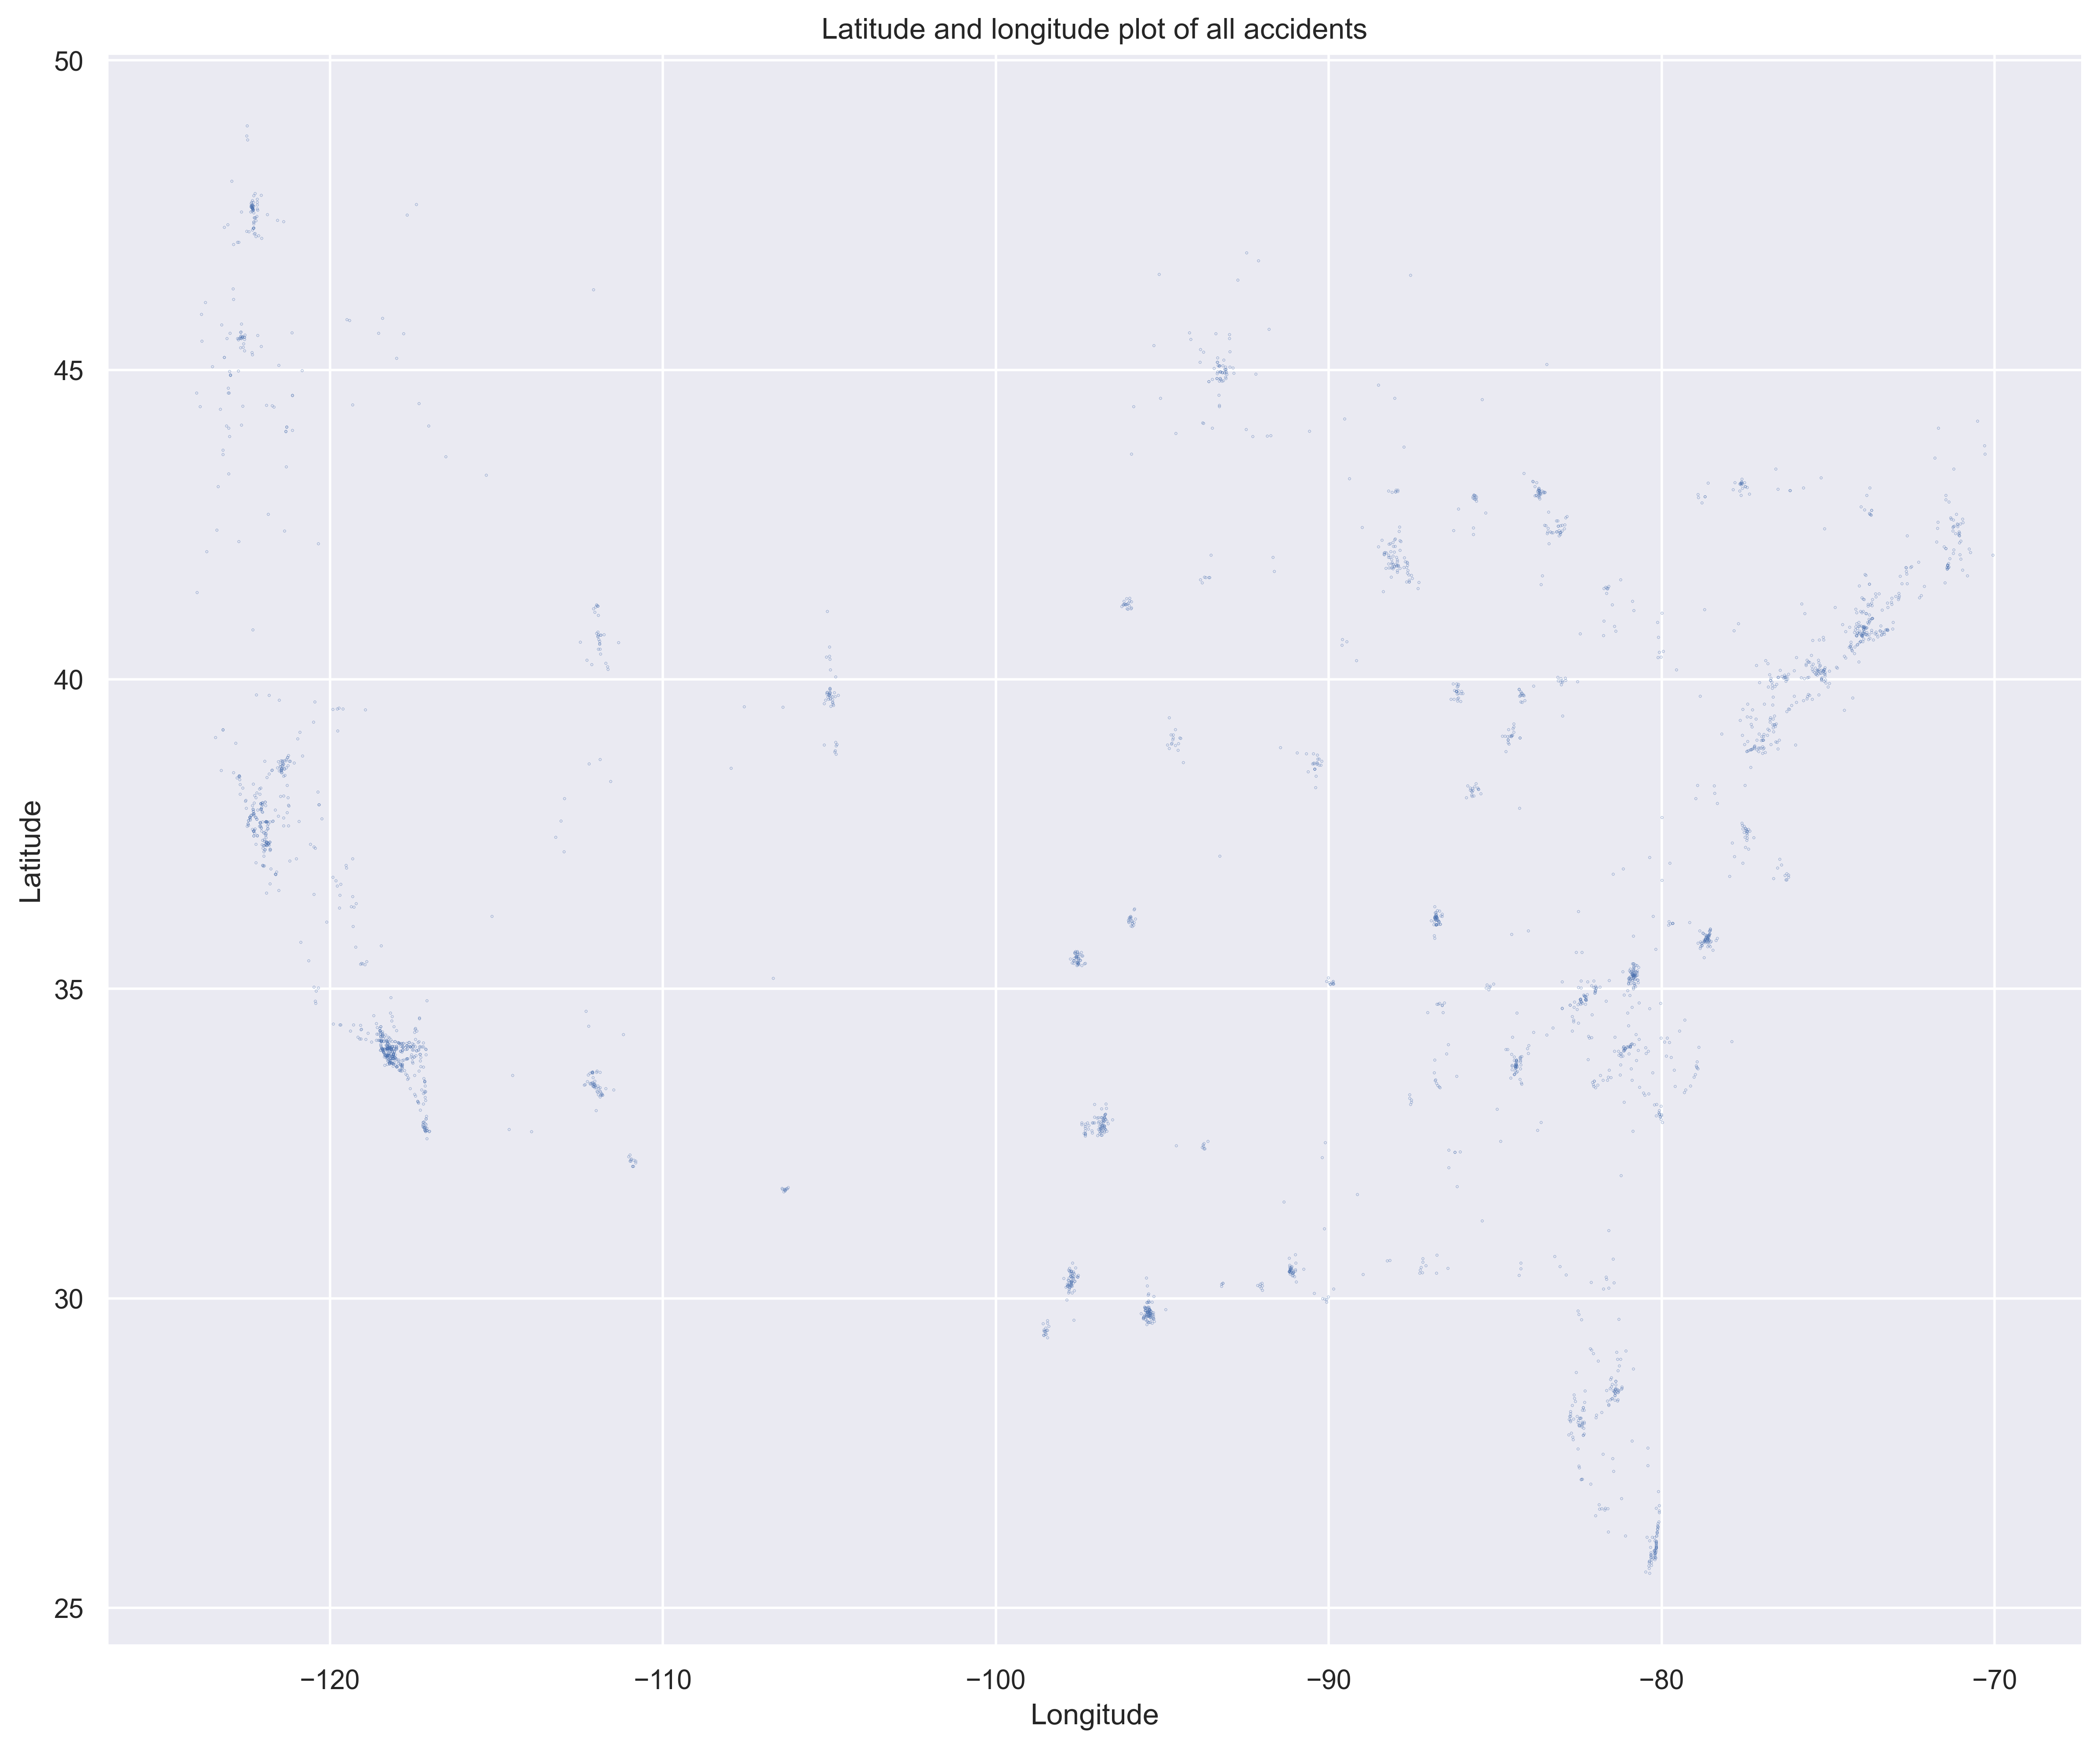

In [18]:
plt.figure(figsize=(14.5, 12), dpi=400)
plt.scatter('StartLng','StartLat', data=df,s=0.01, alpha=1)
plt.title("Latitude and longitude plot of all accidents")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
ax.set(facecolor = "white")
#plt.savefig("AccidentsOnMapHighRes.png",dpi=280)
plt.show()

## Plotting accident locations with big citites

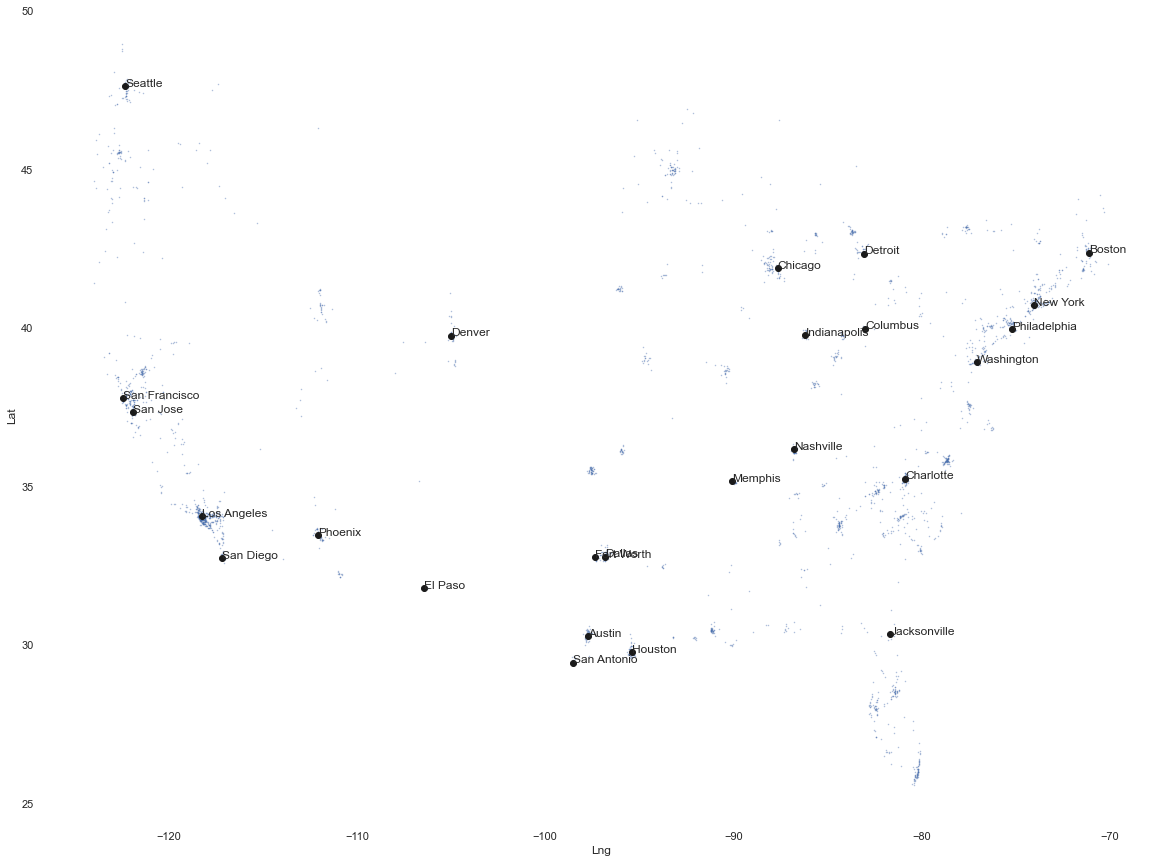

In [14]:
l=25

fig, ax = plt.subplots(figsize=(20, 15))
# plot
ax.scatter('StartLng','StartLat', data=df,s=0.2, alpha=0.5)
# annotate points in axis
ax.scatter(x=df_merged.nlargest(l, columns=['Population'])['lon'],y=df_merged.nlargest(l, columns=['Population'])['lat'],c='k')
for idx, row in df_merged.nlargest(l, columns=['Population']).iterrows():
    ax.annotate(row['City'], (row['lon'], row['lat']) )

# set labels
ax.set_xlabel('Lng')
ax.set_ylabel('Lat')
ax.set(facecolor = "white")
plt.show()